# Yahoo Finance 下載台積電股價資料


In [1]:
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

In [2]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c5/98/6fd94db428a9670d638d4469cedfea51671de0126b8f50de1b06e2245c97/yfinance-0.2.50-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/d2/df/be3fa0457ff661301228f4c59c630699568c8ed9b5480f113b3eea7d0cb3/frozendict-2.4.6-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/948.2 kB ? eta -:--:--
     -- ---------------------------------- 61.4/948.2 kB 656.4 kB/s eta 0:00:02
     ------ ------------------------------- 153.6/948.2 kB 1.1 MB/s eta 0:00:01
     --------------- ---------------------- 389.1

# 台積電股價資料

In [450]:
TSMC = yf.Ticker("2330.TW")
TSMC.info


{'address1': 'Hsinchu Science Park',
 'address2': 'No. 8, Li-Hsin Road 6',
 'city': 'Hsinchu City',
 'zip': '300096',
 'country': 'Taiwan',
 'phone': '886 3 563 6688',
 'fax': '886 3 563 7000',
 'website': 'https://www.tsmc.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited, together with its subsidiaries, manufactures, packages, tests, and sells integrated circuits and other semiconductor devices in Taiwan, China, Europe, the Middle East, Africa, Japan, the United States, and internationally. It provides a range of wafer fabrication processes, including processes to manufacture complementary metal- oxide-semiconductor (CMOS) logic, mixed-signal, radio frequency, embedded memory, bipolar CMOS mixed-signal, and others. The company also offers customer and engineering support se

In [451]:
tsmc = yf.download('2330.TW',start='2016-01-01',end='2021-01-01')
tsmc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,,
2016-01-04,108.037186,139.5,143.5,139.0,142.5,39169000
2016-01-05,106.875481,138.0,140.0,137.0,139.0,46381000
2016-01-06,104.939346,135.5,138.0,135.0,138.0,53617000
2016-01-07,103.003174,133.0,135.0,130.5,134.5,62539000
2016-01-08,103.777679,134.0,135.0,132.0,132.0,50123000
...,...,...,...,...,...,...
2020-12-25,475.020355,511.0,515.0,510.0,514.0,12327895
2020-12-28,478.738678,515.0,515.0,509.0,512.0,19087382


In [452]:
tsmc = yf.download('2330.TW',period='2y', interval='1d')
avg_values = (tsmc['High'] + tsmc['Low']) / 2
avg_values.to_csv('tsmc_avg_prices.csv')
avg_values


[*********************100%***********************]  1 of 1 completed


Ticker,2330.TW
Date,
2022-12-13,473.50
2022-12-14,476.25
2022-12-15,478.00
2022-12-16,468.25
2022-12-19,467.25
...,...
2024-12-09,1070.00
2024-12-10,1067.50
2024-12-11,1052.50


In [453]:
avg_values = pd.read_csv('tsmc_avg_prices.csv')
avg_values

,Date,2330.TW
0,2022-12-13,473.50
1,2022-12-14,476.25
2,2022-12-15,478.00
3,2022-12-16,468.25
4,2022-12-19,467.25
...,...,...
478,2024-12-09,1070.00
479,2024-12-10,1067.50
480,2024-12-11,1052.50
481,2024-12-12,1060.00


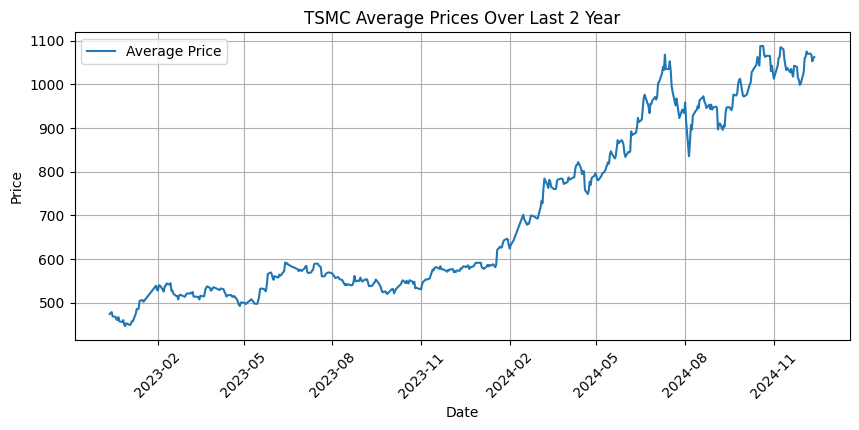

In [454]:
# 繪製折線圖
plt.figure(figsize=(10, 4))
# 將Datetime轉換為datetime格式以便更好地處理時間軸
avg_values['Date'] = pd.to_datetime(avg_values['Date'])
# 設定x軸的刻度為每3個月一個標籤
plt.plot(avg_values['Date'], avg_values['2330.TW'], label='Average Price')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.title('TSMC Average Prices Over Last 2 Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [455]:
#SEQ_LEN = 60
#FUTURE_PERIOD_PREDICT = 1 #day, how far into the future are we trying to predict?
#RATIO_TO_PREDICT = "avg"
# 設定參數
SEQ_LEN = 30  # 序列長度
FUTURE_PERIOD_PREDICT = 1  # 預測未來天數
RATIO_TO_PREDICT = "2330.TW"  # 要預測的欄位

In [456]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [457]:
avg_values['future'] = avg_values[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
avg_values['target'] = list(map(classify, avg_values[RATIO_TO_PREDICT], avg_values['future']))
avg_values

,Date,2330.TW,future,target
0,2022-12-13,473.50,476.25,1
1,2022-12-14,476.25,478.00,1
2,2022-12-15,478.00,468.25,0
3,2022-12-16,468.25,467.25,0
4,2022-12-19,467.25,461.00,0
...,...,...,...,...
478,2024-12-09,1070.00,1067.50,0
479,2024-12-10,1067.50,1052.50,0
480,2024-12-11,1052.50,1060.00,1
481,2024-12-12,1060.00,1062.50,1


In [458]:
times = sorted(avg_values.index.values)  # get the times
last_10pct = sorted(avg_values.index.values)[-int(0.1*len(times))]  # get the last 10% of the times
last_20pct = sorted(avg_values.index.values)[-int(0.2*len(times))]  # get the last 20% of the times

test_df = avg_values[(avg_values.index >= last_10pct)]
validation_df = avg_values[(avg_values.index >= last_20pct) & (avg_values.index < last_10pct)]  
train_df = avg_values[(avg_values.index < last_20pct)]  # now the train_df is all the data up to the last 20%

print(f"Test data size: {len(test_df)}")
print(f"Validation data size: {len(validation_df)}")
print(f"Train data size: {len(train_df)}")



Test data size: 48
Validation data size: 48
Train data size: 387


In [459]:
train_df.drop(columns=["Date", "future"], inplace=True)
validation_df.drop(columns=["Date", "future"], inplace=True)
test_df.drop(columns=["Date", "future"], inplace=True)# don't need this anymore.
train_df.head()

C:\Users\eddyw\AppData\Local\Temp\ipykernel_62472\2157429003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=["Date", "future"], inplace=True)
C:\Users\eddyw\AppData\Local\Temp\ipykernel_62472\2157429003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df.drop(columns=["Date", "future"], inplace=True)
C:\Users\eddyw\AppData\Local\Temp\ipykernel_62472\2157429003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,2330.TW,target
0,473.50,1
1,476.25,1
2,478.00,0
3,468.25,0
4,467.25,0


In [460]:
train_data = train_df[RATIO_TO_PREDICT].values
valid_data = validation_df[RATIO_TO_PREDICT].values
test_data = test_df[RATIO_TO_PREDICT].values
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)


(387,)
(48,)
(48,)


In [461]:
train_data = train_data.reshape(-1,1)
valid_data = valid_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)


(387, 1)
(48, 1)
(48, 1)


In [462]:
scaler = MinMaxScaler()

In [463]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 50
for di in range(0,350,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

if len(train_data[di+smoothing_window_size:,:]) > 0:
  # You normalize the last bit of remaining data
  scaler.fit(train_data[di+smoothing_window_size:,:])
  train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [464]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data and validation data
valid_data = scaler.transform(valid_data).reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

In [465]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,valid_data, test_data],axis=0)

In [466]:
X_train = []
y_train = []
for i in range(SEQ_LEN, len(train_data)):
    X_train.append(train_data[i-SEQ_LEN:i])
    y_train.append(train_data[i + (FUTURE_PERIOD_PREDICT-1)])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [467]:
X_valid = []
y_valid = []
for i in range(SEQ_LEN, len(valid_data)):
    X_valid.append(valid_data[i-SEQ_LEN:i])
    y_valid.append(valid_data[i+(FUTURE_PERIOD_PREDICT-1)])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

if len(X_valid) > 0:
    X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [468]:
X_test = []
y_test = []
for i in range(SEQ_LEN, len(test_data)):
    X_test.append(test_data[i-SEQ_LEN:i])
    y_test.append(test_data[i+(FUTURE_PERIOD_PREDICT-1)])
    
X_test, y_test = np.array(X_test), np.array(y_test)
if len(X_test) > 0:
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [469]:
y_train.shape

(357,)

In [470]:
y_valid.shape

(18,)

In [471]:
X_train_2 = []
y_train_2 = []
for i in range(SEQ_LEN, len(train_data)):
    X_train_2.append(train_data[i-SEQ_LEN:i])
    y_train_2.append(train_data[i + (FUTURE_PERIOD_PREDICT-1)])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)

X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))

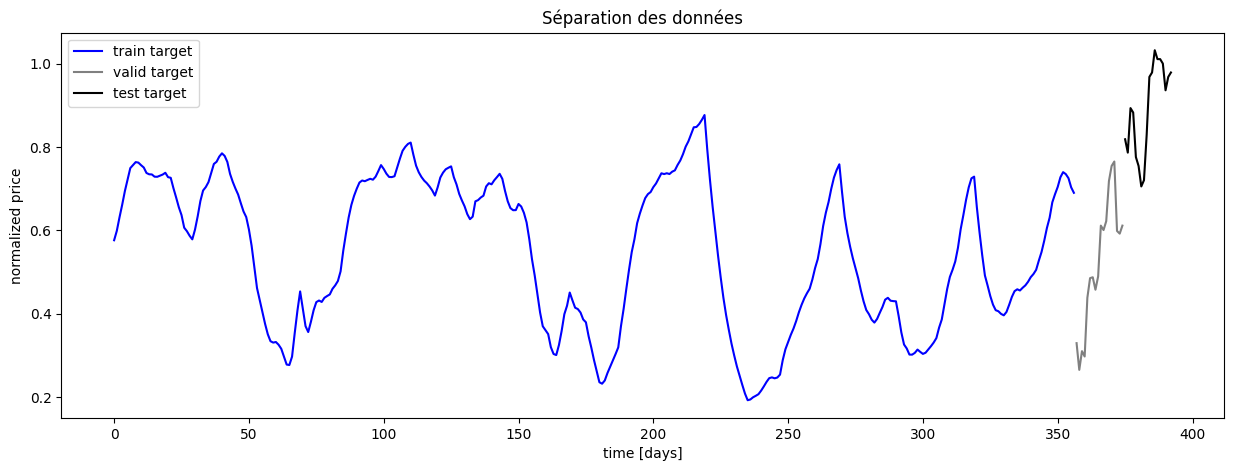

In [472]:
## show predictions
plt.figure(figsize=(15, 5))

plt.plot(np.arange(y_train_2.shape[0]), y_train_2, color='blue', label='train target')

plt.plot(np.arange(y_train_2.shape[0], y_train_2.shape[0]+y_valid.shape[0]), y_valid,
         color='gray', label='valid target')

plt.plot(np.arange(y_train_2.shape[0]+y_valid.shape[0],
                   y_train_2.shape[0]+y_valid.shape[0]+y_test.shape[0]),
         y_test, color='black', label='test target')


plt.title('Séparation des données')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()


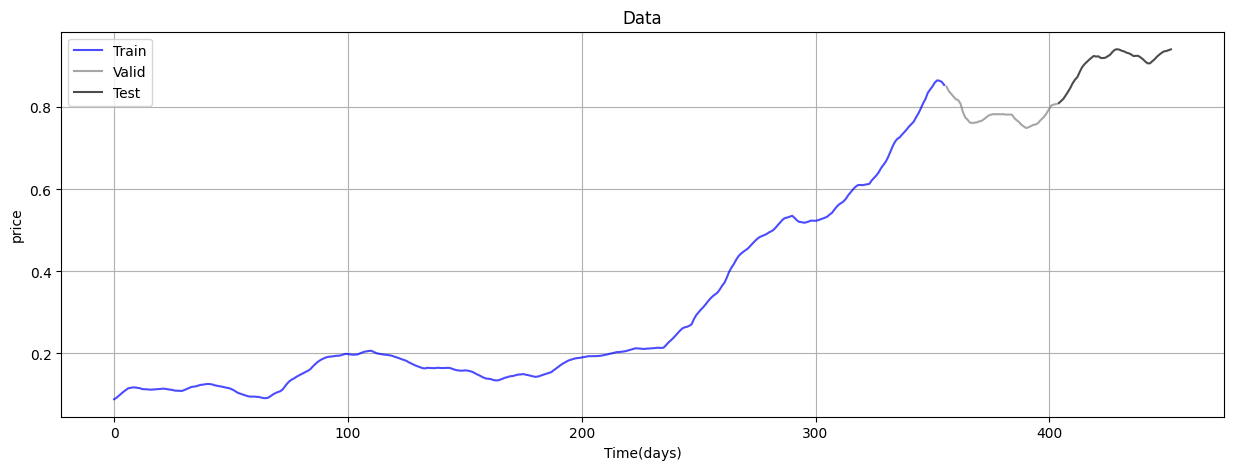

總數據量: 483
訓練集大小: 356
驗證集大小: 48
測試集大小: 49


In [473]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
SEQ_LEN = 30
FUTURE_PERIOD_PREDICT = 1
RATIO_TO_PREDICT = "2330.TW"

# 獲取所有數據並進行預處理
all_data = avg_values[RATIO_TO_PREDICT].values.reshape(-1, 1)

# 使用MinMaxScaler進行整體歸一化
scaler = MinMaxScaler()
all_data_scaled = scaler.fit_transform(all_data)

# 應用EMA平滑處理到整個數據集
def apply_ema(data, gamma=0.1):
    ema = 0.0
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        ema = gamma * data[i] + (1 - gamma) * ema
        smoothed_data[i] = ema
    return smoothed_data

all_data_smoothed = apply_ema(all_data_scaled)

# 計算分割點
total_len = len(all_data_smoothed)
train_len = int(0.8 * total_len)
valid_len = int(0.1 * total_len)
test_len = total_len - train_len - valid_len

# 創建序列數據的函數
def create_sequences(data, seq_length, future_period):
    X, y = [], []
    for i in range(len(data) - seq_length - future_period + 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length + future_period - 1])
    return np.array(X), np.array(y)

# 創建完整的序列數據
X_all, y_all = create_sequences(all_data_smoothed, SEQ_LEN, FUTURE_PERIOD_PREDICT)

# 分割序列數據
train_end = train_len - SEQ_LEN
val_end = train_len + valid_len - SEQ_LEN

X_train = X_all[:train_end]
y_train = y_all[:train_end]

X_valid = X_all[train_end:val_end]
y_valid = y_all[train_end:val_end]

X_test = X_all[val_end:]
y_test = y_all[val_end:]

# 重塑數據
if len(X_train) > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
if len(X_valid) > 0:
    X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
if len(X_test) > 0:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 畫出預測圖表
plt.figure(figsize=(15, 5))

# 繪製訓練數據
if len(y_train) > 0:
    plt.plot(range(len(y_train)), y_train, 
             color='blue', label='Train', alpha=0.7)

# 繪製驗證數據
if len(y_valid) > 0:
    plt.plot(range(len(y_train), len(y_train) + len(y_valid)), 
             y_valid, color='gray', label='Valid', alpha=0.7)

# 繪製測試數據
if len(y_test) > 0:
    plt.plot(range(len(y_train) + len(y_valid), 
                   len(y_train) + len(y_valid) + len(y_test)),
             y_test, color='black', label='Test', alpha=0.7)

plt.title('Data')
plt.xlabel('Time(days)')
plt.ylabel('price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 打印數據集大小
print(f"總數據量: {len(all_data_smoothed)}")
print(f"訓練集大小: {len(y_train)}")
print(f"驗證集大小: {len(y_valid)}")
print(f"測試集大小: {len(y_test)}")